<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/Spielwiese%20Auswertung%20Vorselektion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')


Mounted at /content.gdrive


In [9]:
import json
import numpy as np
#with open('/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/results.json', "r") as fp:
#with open('/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/results.json', "r") as fp:
with open('/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/results.json', "r") as fp:
  data = json.load(fp)

SOLL = np.array(data["SOLL"])
IST = np.array(data["Selection"])

for i, x in enumerate(SOLL):
  print(SOLL[i], "-----", IST[i])
  if len(IST[i]) == 1 and len(SOLL[i]) == 1 and SOLL[i][0] == IST[i][0]:
    print("OK")
  if len(IST[i]) == 1 and len(SOLL[i]) == 2:
    if SOLL[i][0] == IST[i][0] or SOLL[i][1] == IST[i][0]:
      print("OK")
  if len(IST[i]) == 2 and len(SOLL[i]) == 1:
    if SOLL[i][0] == IST[i][0] or SOLL[i][0] == IST[i][1]:
      print("OK")
  if len(IST[i]) == 2 and len(SOLL[i]) == 2:
    if SOLL[i][0] == IST[i][0] or SOLL[i][0] == IST[i][1] or SOLL[i][1] == IST[i][0] or SOLL[i][1] == IST[i][1] :
      print("OK")



['1_0158'] ----- ['1_0157']
['1_0157'] ----- ['1_0157']
OK
['1_0173', '4_0173'] ----- ['1_0173', '4_0181']
OK
['1_0166', '4_0166'] ----- ['1_0163', '4_0168']
['4_0196'] ----- ['4_0196']
OK
['3_0198', '4_0198'] ----- ['3_0217']
['3_0219'] ----- ['3_0234']
['3_0215'] ----- ['3_0218', '3_0226']
['1_0170'] ----- ['1_0169', '4_0184']
['1_0151', '2_0151'] ----- ['1_0152']
['1_0179', '4_178'] ----- ['1_0178', '4_0177']
['1_0196', '4_0196'] ----- ['1_0196', '4_0199']
OK
['4_0183'] ----- ['4_0177']
['1_0169', '4_0169'] ----- ['1_0170', '1_0177', '4_0190']
['3_0193', '4_0193'] ----- ['4_0194']


<ipython-input-9-d5dfe5749a8c>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SOLL = np.array(data["SOLL"])
<ipython-input-9-d5dfe5749a8c>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  IST = np.array(data["Selection"])


In [11]:
#to compare
Labels = { '29':'1_0158', '30':'1_0157', '31':'1_0173/4_0173', '32':'1_0166/4_0166', '33':'4_0196', '34':'3_0198/4_0198', '35':'3_0219', '36':'3_0215', '42':'1_0170', '43':'1_0151/2_0151', '44':'1_0179/4_178', '45':'1_0196/4_0196', '46':'4_0183', '47':'1_0169/4_0169', '48':'3_0193/4_0193'}
print(Labels['29'])
print(Labels['42'])
td = Labels.keys()
print(list(td))


1_0158
1_0170
['29', '30', '31', '32', '33', '34', '35', '36', '42', '43', '44', '45', '46', '47', '48']


Enter which Results you want to see: (1 for landing sequence, 2 for landing/flight, 3 for landing frame) 2
Results of the landing/flight selection


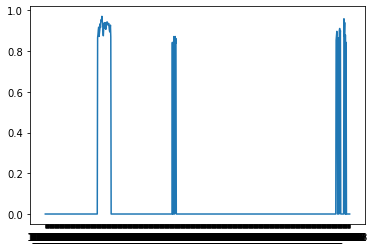

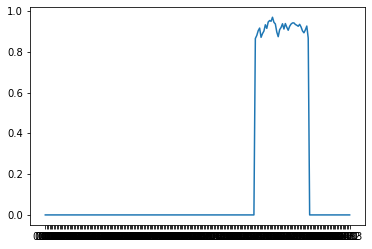

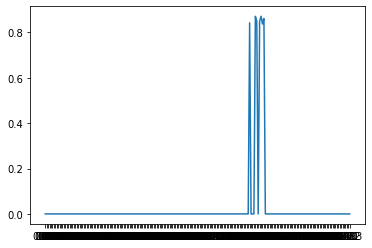

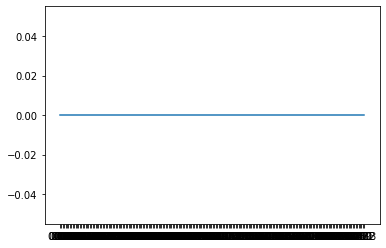

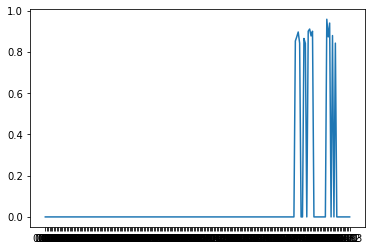

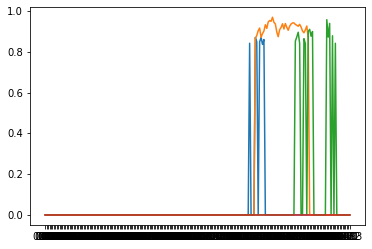

The Preselection would detect landings in following frames:  ['1_0173', '4_0181']
By manually labeling following frame is the landing:  1_0173/4_0173


In [13]:
#manually selection 

import json
import numpy as np
import matplotlib.pyplot as plt
import os

xx = '31'

landing_pic = "/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/" + xx

Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx

Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx


Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx


x = 0.83

name = 'confthres' + str(x)




x = input ("Enter which Results you want to see: (1 for landing sequence, 2 for landing/flight, 3 for landing frame) ")
if x == '1':
  Path = Path_Result_1
  print("Results of the landing sequence selection")
elif x == '2':
  Path = Path_Result_2
  print("Results of the landing/flight selection")
elif x == '3':
  Path = Path_Result_3
  print("Results of the landing frame selection")
else:
  print("Wrong choise - i show the results of the landing/flight selection")
  Path = Path_Result_3

with open(Path + '/' + name + '/list.json', "r") as fp:
    data = json.load(fp)
  
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])


X = index
Y = conf

plt.plot(X, Y)
plt.show()

index1 = []
conf1 = []
cls1 = []
index2 = []
conf2 = []
cls2 = []
index3 = []
conf3 = []
cls3 = []
index4 = []
conf4 = []
cls4 = []

for i, x in enumerate(index):
    if x[0] == '1':
      conf2.append(conf[i])
      index2.append(x[2:])
      cls2.append(cls[i])
    elif x[0] == '2':
      conf1.append(conf[i])
      index1.append(x[2:])
      cls1.append(cls[i])
    elif x[0] == '3':
      conf4.append(conf[i])
      index4.append(x[2:])
      cls4.append(cls[i])
    elif x[0] == '4':
      conf3.append(conf[i])
      index3.append(x[2:])
      cls3.append(cls[i])



plt.plot(index2, conf2)
plt.show()
plt.plot(index1, conf1)
plt.show()
plt.plot(index4, conf4)
plt.show()
plt.plot(index3, conf3)
plt.show()

plt.plot(index1, conf1)
plt.plot(index2, conf2)
plt.plot(index3, conf3)
plt.plot(index4, conf4)
plt.show()


if 1 in cls:
 
    detections = []
    lastcls = 9
    for i, c in enumerate(cls1):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("2_" + index1[i])
            lastcls = 9

    lastcls = 9
    for i, c in enumerate(cls2):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("1_" + index2[i])
            lastcls = 9

    lastcls = 9
    for i, c in enumerate(cls3):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("4_" + index3[i])
            lastcls = 9

    lastcls = 9
    for i, c in enumerate(cls4):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("3_" + index4[i])
            lastcls = 9



    print("The Preselection would detect landings in following frames: ", detections)


else:

    maxindex = np.argmax(conf)
    detection = index[maxindex]  
    print("The Preselection would detect the landing in following frame: ", detection)


print("By manually labeling following frame is the landing: ", Labels[xx])





